Training on FEN 1: 8/8/3R4/3K3k/8/8/8/8 w - - 0 1
Training completed in 1.56 seconds.
Training on FEN 2: 8/8/8/8/8/2K1k3/6R1/8 w - - 0 1
Training completed in 1.80 seconds.
Training on FEN 3: 3K4/R7/8/8/6k1/8/8/8 w - - 0 1
Training completed in 1.82 seconds.
Training on FEN 4: 8/8/3K4/8/8/2R5/8/3k4 w - - 0 1
Training completed in 1.48 seconds.
Training on FEN 5: 8/8/8/k7/8/4R3/3K4/8 w - - 0 1
Training completed in 2.01 seconds.
Training on FEN 6: 1K6/8/8/5k2/8/7R/8/8 w - - 0 1
Training completed in 1.48 seconds.
Training on FEN 7: 8/8/1k6/8/3R3K/8/8/8 w - - 0 1
Training completed in 1.45 seconds.
Training on FEN 8: 8/4K3/2R5/8/8/8/8/7k w - - 0 1
Training completed in 1.79 seconds.
Training on FEN 9: 8/8/8/4k3/8/8/1K6/3R4 w - - 0 1
Training completed in 1.60 seconds.
Training on FEN 10: 8/8/8/5R1K/8/k7/8/8 w - - 0 1
Training completed in 1.84 seconds.
Training on FEN 11: 7R/8/2K2k2/8/8/8/8/8 w - - 0 1
Training completed in 1.19 seconds.
Training on FEN 12: 8/8/5k2/8/4R3/8/8/3K4 w - - 0 

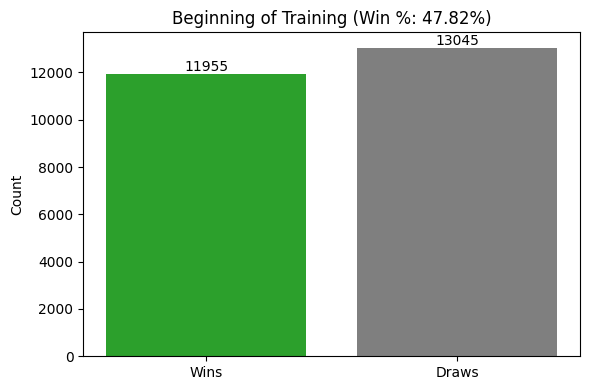

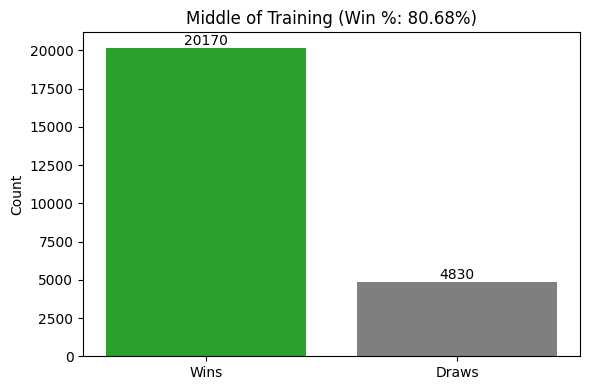

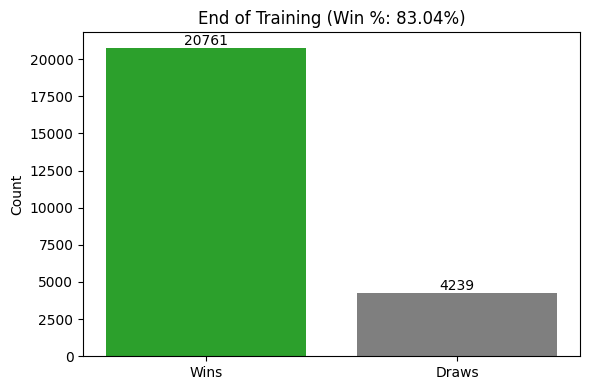

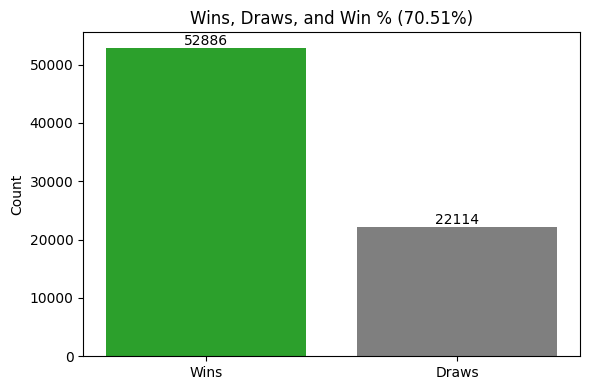

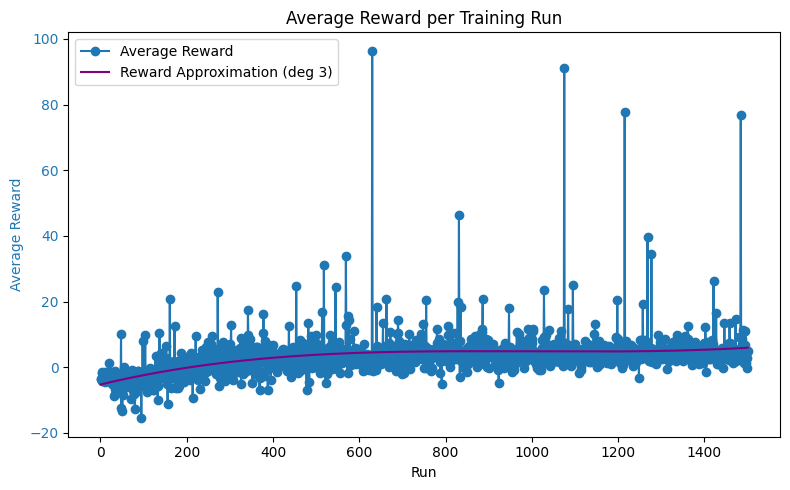

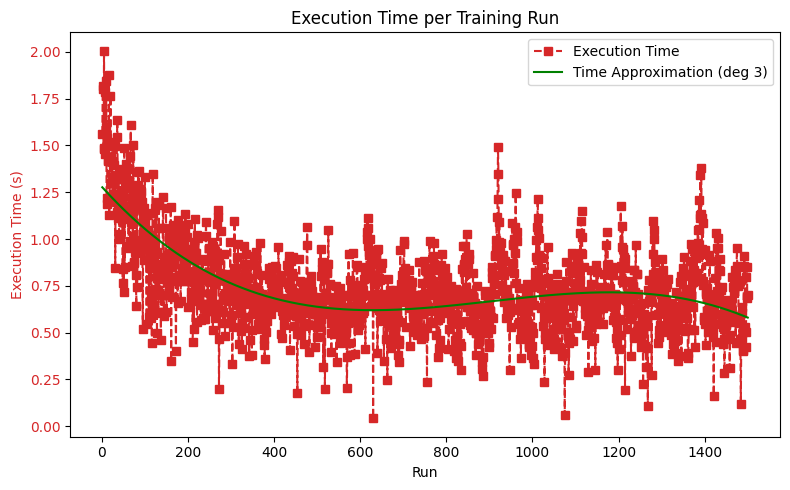

Training completed and Q-table saved.


In [3]:

from training_qtable_random import QTableTrainer, plot_avg_reward_and_time, plot_training_results
from states.QTable import QTable
from states.state_KRvsk import State



# Test for QTableTrainer training
if __name__ == "__main__":
    qtable = QTable()
    trainer = QTableTrainer(qtable=qtable, epsilon_start=0.2, epsilon_decay=0.999, alpha=0.5, gamma=0.9, min_epsilon=0.1)

    trained_fens = []
    list_of_times = []
    list_of_results = []
    num_random_fens = 1500
    episodes_per_fen = 50

    try:
        for i in range(num_random_fens):
            fen = State.random_kr_vs_k_fen()
            print(f"Training on FEN {i+1}: {fen}")
            trained_bool, episode_results, time = trainer.train(episodes=episodes_per_fen, initial_fen=fen)
            if trained_bool:
                print(f"  Successfully trained on FEN: {fen}")
                # Record all symmetric FENs
                for sym_fen, sym_action in State.fen_action_symmetries(fen, None):
                    trained_fens.append(sym_fen)
            #plot_training_results(episode_results)
            list_of_times.append(time)
            list_of_results.append(episode_results)

    except KeyboardInterrupt:
        print("Training interrupted by user.")
    finally:
        # Plot average reward and time
        plot_avg_reward_and_time(list_of_results, list_of_times)
        
        # Save the Q-table regardless of interruption
        trainer.save_qtable("results", "test_trained_qtable.json")
        print("Training completed and Q-table saved.")